<a href="https://colab.research.google.com/github/rzunick/MNA-Vision-Computacional-Equipo-18/blob/main/9_6_M%C3%A9todos_de_Segmentaci%C3%B3n_Super_Pixels_E18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.segmentation import slic #SLIC (Simple Linear Iterative Clustering)
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

from skimage import io
import matplotlib.pyplot as plt

In [ ]:
#Loading the image as a float array
imageMatrix = img_as_float(io.imread("Example.jpg"))
imageMatrix.shape

(512, 1024, 3)

In [ ]:
#Segmantation of the image and extract the segments
n_seg = 200
segments = slic(imageMatrix, n_segments= n_seg, compactness=10, sigma=1)

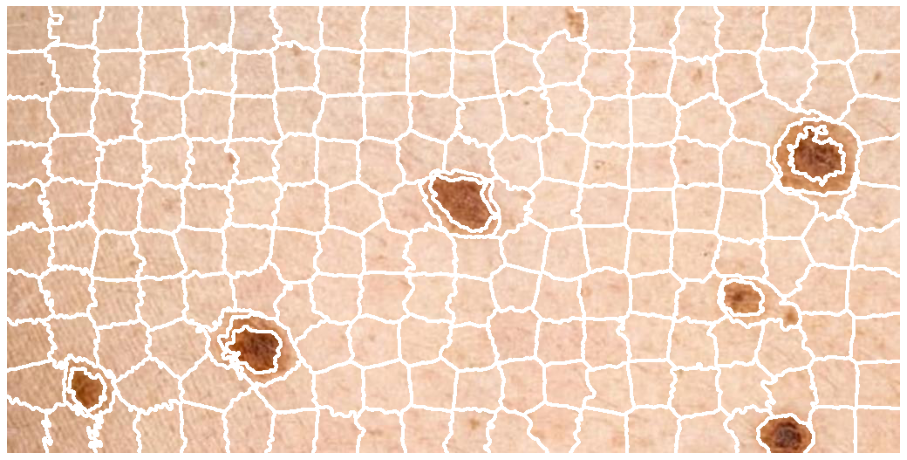

In [ ]:
#Display the results
fig = plt.figure ("Super Pixels - %d segments"%(n_seg), figsize=(16, 12))
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(imageMatrix,segments,color=(1,1,1), outline_color=(1,1,1)))

plt.axis("off")
plt.show()

In [ ]:
fig.savefig('Result.jpg', dpi=300)